# Decision Tree Iris Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
RANDOM_SEED = 9
DATASPLIT = 0.3

In [3]:
dataset = load_iris(as_frame=True)


data = dataset.data
labels = dataset.target

data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size=DATASPLIT, random_state=RANDOM_SEED)

data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size=DATASPLIT, random_state=RANDOM_SEED)

print(f"Train dataset length: {len(data_train)}, Validation dataset length: {len(data_val)}, Test dataset length: {len(data_test)}")
data_train.describe()


Train dataset length: 73, Validation dataset length: 32, Test dataset length: 45


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,73.000000,73.000000,73.000000,73.000000
mean,5.835616,3.064384,3.784932,1.195890
std,0.801972,0.461691,1.742816,0.738888
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.400000


In [4]:
parameters = {
    'max_depth': range(3,20)
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), parameters, n_jobs=4)

clf.fit(data_val, label_val)

model = clf.best_estimator_
print("Best corssvalidation score: ", clf.best_score_)
print("With parameters: ", clf.best_params_)

print("Training model with best parameters")
model.fit(data_train, label_train)

accuracy = model.score(data_test, label_test)
print("Accuracy: ", accuracy)

predictions = model.predict(data_test)
f1 = f1_score(label_test, predictions, average='weighted')

print("F1 score: ", f1)



Best corssvalidation score:  0.8761904761904763
With parameters:  {'max_depth': 4}
Training model with best parameters
Accuracy:  1.0
F1 score:  1.0


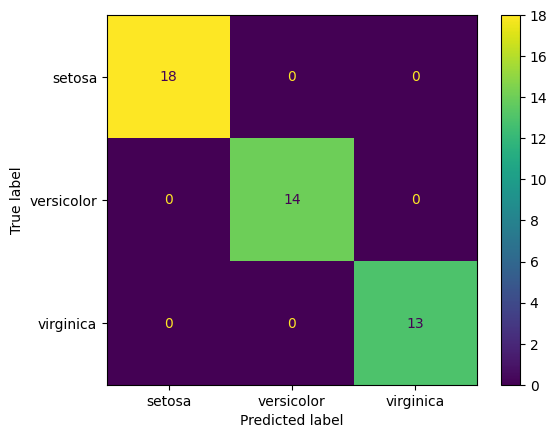

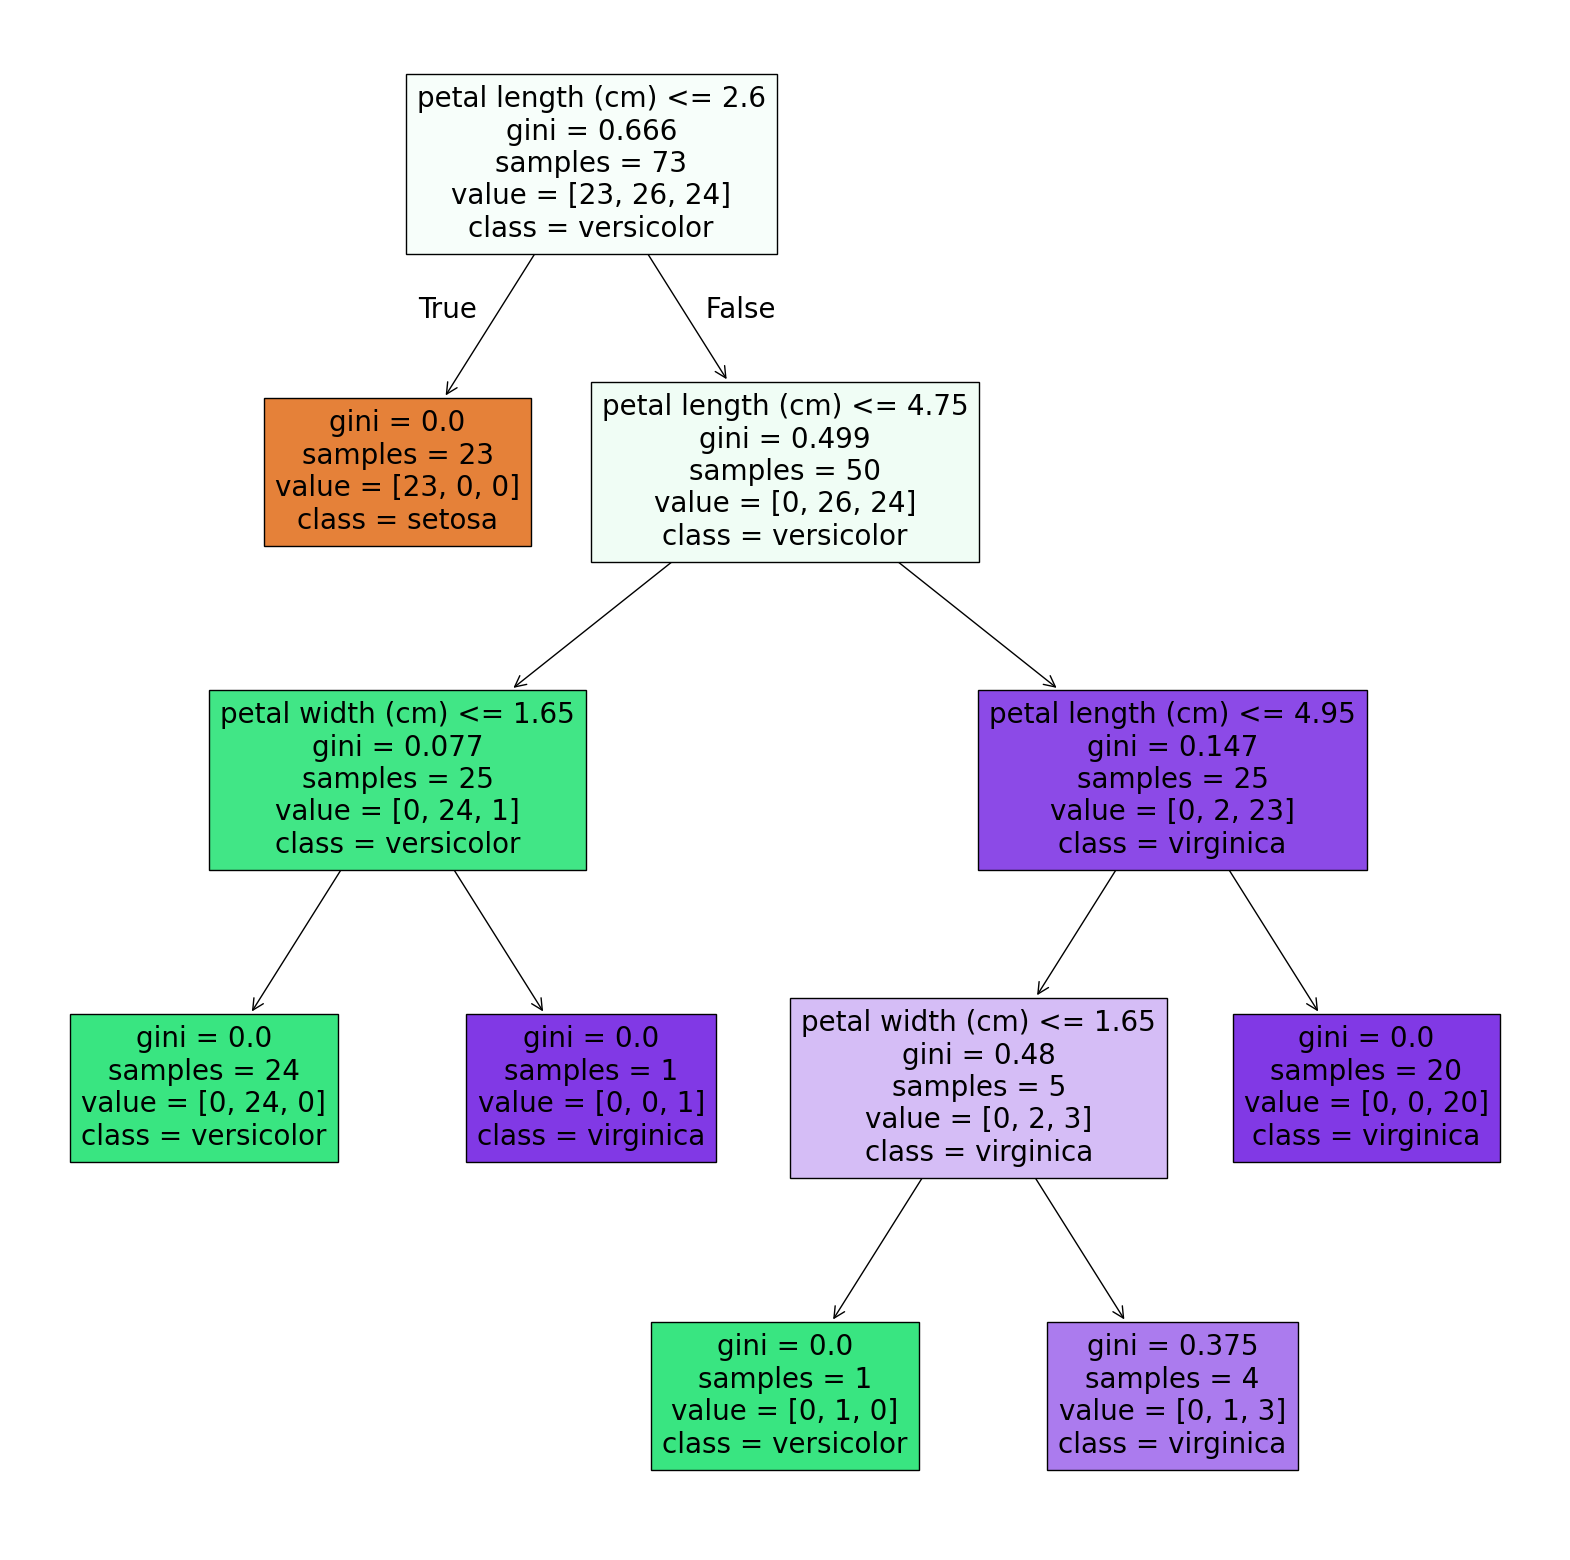

In [5]:
cm = confusion_matrix(label_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot()
plt.show()

plt.figure(figsize=(20,20))
plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()